Required Libraries

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load the data

In [187]:
df1=pd.read_csv("olx_data.csv") #data scrapped from olx
df2=pd.read_csv("Car_dekho_data.csv")   #data scrapped from car dekho 

In [188]:
#Let's concatenate bot the data frames into single data frame
df=pd.concat([df1,df2],ignore_index=True)

In [189]:
df.head()

,Unnamed: 0,Price,Brand,Model,Kilometers_driven,Year,Fuel,Transmission,Variant,No_owners,Location
0,0,229000,Chevrolet,Beat,"69,000 km",2011,Diesel,Manual,2010-2013 Diesel LT Option,3rd,Bangalore
1,1,2590000,Toyota,Camry,"22,000 km",2016,Petrol,Automatic,2.5 Hybrid,1st,Bangalore
2,2,195000,Maruti Suzuki,Zen Estilo,"69,000 km",2009,Petrol,Manual,VXI BSIII,3rd,Bangalore
3,3,Na,Na,Na,Na,Na,Na,Na,Na,Na,Bangalore
4,4,Na,Na,Na,Na,Na,Na,Na,Na,Na,Bangalore


In [190]:
df.tail()

,Unnamed: 0,Price,Brand,Model,Kilometers_driven,Year,Fuel,Transmission,Variant,No_owners,Location
6256,1979,950000,Hyundai,Venue,"10,000 kms",2020,Petrol,Manual,SX Opt Turbo BSIV,SecondOwner,Shimla
6257,1980,300000,Maruti,Swift,"50,000 kms",2011,Petrol,Manual,VXi,SecondOwner,Shimla
6258,1981,130000,Maruti,800,"30,000 kms",2013,Petrol,Manual,Std BSIII,SecondOwner,Shimla
6259,1982,115000,Maruti,Alto,"80,000 kms",2004,Petrol,Manual,LX,Thirdowner,Shimla
6260,1983,NaN,Maruti,800,"15,000 kms",2002,Petrol,Manual,AC,Thirdowner,Shimla


In [191]:
df.shape

(6261, 11)

In [192]:
#In the given data there are values "NA" these are Nan values. So change all "Na" values to Null values.
#First change "Na" values to Null valuesand drop those null value.
df.replace("Na",np.nan,inplace=True)
df.dropna(axis=0,inplace=True)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5868 entries, 0 to 6259
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         5868 non-null   int64 
 1   Price              5868 non-null   object
 2   Brand              5868 non-null   object
 3   Model              5868 non-null   object
 4   Kilometers_driven  5868 non-null   object
 5   Year               5868 non-null   object
 6   Fuel               5868 non-null   object
 7   Transmission       5868 non-null   object
 8   Variant            5868 non-null   object
 9   No_owners          5868 non-null   object
 10  Location           5868 non-null   object
dtypes: int64(1), object(10)
memory usage: 550.1+ KB


In [194]:
#column "Unnamed: 0" is unnecessary column it just contains the s.no,let's remove this column
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [195]:
df.columns

Index(['Price', 'Brand', 'Model', 'Kilometers_driven', 'Year', 'Fuel',
       'Transmission', 'Variant', 'No_owners', 'Location'],
      dtype='object')

In [196]:
df.nunique()

Price                1138
Brand                  35
Model                 245
Kilometers_driven    2396
Year                   53
Fuel                    7
Transmission            3
Variant              1661
No_owners              16
Location               22
dtype: int64

Year

In [197]:
pd.set_option('display.max_rows',80)
df["Year"].value_counts()

2016              543
2015              507
2012              502
2017              475
2018              467
2014              456
2013              432
2011              359
2010              313
2019              260
2009              212
2008              143
2007              107
2016               92
2020               88
2013               82
2017               80
2012               78
2014               78
2018               75
2015               71
2010               54
2006               53
2011               47
2019               41
2005               34
Semi-Furnished     31
2020               24
2007               22
2009               21
2008               20
2021               18
2004               15
2021               13
2006               10
2003                8
2002                5
2005                4
1998                3
2000                3
2001                3
1993                2
1999                2
2003                2
2016.0              2
1997      

In [198]:
#We can see that some how we got #Semi-Furnished value in column year
   
#we will replace these values with nan
#Also some years have float we will replace them as integer

In [199]:
df['Year']=df['Year'].replace('Semi-Furnished', np.NaN)
df['Year']=df['Year'].astype(float) #I changed the datatype as float because then only the replaced nan values will be shown

Fuel

In [200]:
df['Fuel'].value_counts()

Petrol           3099
Diesel           2652
CNG                51
Ready to Move      31
LPG                17
CNG & Hybrids      16
Electric            2
Name: Fuel, dtype: int64

In [201]:
#In the column "Fuel" except "Petrol", "Diesel", "CNG", "CNG & Hybrids", "LPG", "Electric" the remaining data is not right.
#we will replace the wrong data with nan nalues

In [202]:
df['Fuel']=df['Fuel'].astype(str).replace('Ready to Move',np.nan).replace('Manual', np.nan).replace('Automatic',np.nan).replace('1 km',np.nan).replace('56,000 km',np.nan).replace('1st',np.nan).replace('670,000 km',np.nan).replace('88,000 km',np.nan).replace('110,000 km',np.nan).replace('70,000 km',np.nan).replace('112,000 km',np.nan).replace('28,300 km',np.nan).replace('61,000 km',np.nan).replace('71,000 km',np.nan).replace('129,000 km',np.nan).replace('14,700 km',np.nan).replace('50,000 km',np.nan).replace('33,500 km',np.nan).replace('45,900 km',np.nan )

Transmission

In [203]:
df["Transmission"].value_counts()

Manual       4701
Automatic    1136
Builder        31
Name: Transmission, dtype: int64

In [204]:
#From the above we can see that except Manual and Automatic all other values should be replced. 
#we will replace them with nan values
df['Transmission']=df['Transmission'].astype(str).replace('Builder',np.nan)

In [205]:
df["Transmission"].value_counts()

Manual       4701
Automatic    1136
Name: Transmission, dtype: int64

No_owners

In [206]:
df['No_owners'].value_counts()

FirstOwner     1888
SecondOwner    1849
Thirdowner      658
1st             563
2nd             229
First owner     200
Firstowner      200
FirstOnwer      197
3rd              39
700              24
ThirdOwner        9
4th               3
600               3
4+                2
2000              2
2150              2
Name: No_owners, dtype: int64

In [207]:
#From above we can see that first second and third owners are mentioned in different ways. 
#So we will replace that different ways to one way 
#and some wrong data also is there we have to replace them with nan values

In [208]:
df['No_owners']=df['No_owners'].astype(str).replace('Firstowner','FirstOwner').replace('1st','FirstOwner').replace('First owner','FirstOwner').replace('FirstOnwer','FirstOwner')
df['No_owners']=df['No_owners'].astype(str).replace('2nd','SecondOwner')
df['No_owners']=df['No_owners'].astype(str).replace('ThirdOwner','Thirdowner').replace('3rd','Thirdowner').replace('4th','Thirdowner').replace('4+','Thirdowner')
df['No_owners']=df['No_owners'].astype(str).replace('700',np.nan).replace('600',np.nan).replace('2000',np.nan).replace('2150',np.nan)

In [209]:
df['No_owners'].value_counts()

FirstOwner     3048
SecondOwner    2078
Thirdowner      711
Name: No_owners, dtype: int64

Kilometers_driven

In [210]:
df['Kilometers_driven'].head()

0    69,000 km
1    22,000 km
2    69,000 km
5    19,000 km
6    39,283 km
Name: Kilometers_driven, dtype: object

In [211]:
df['Kilometers_driven'].tail()

6253    1,20,000 kms
6256      10,000 kms
6257      50,000 kms
6258      30,000 kms
6259      80,000 kms
Name: Kilometers_driven, dtype: object

In [212]:
#we can see that the coulmn Kilometers_driven contains "commas,kms and Km" we need remove these strings
df['Kilometers_driven']=df['Kilometers_driven'].str.replace(',','')
df['Kilometers_driven']=df['Kilometers_driven'].str.replace('km','')
df['Kilometers_driven']=df['Kilometers_driven'].str.replace('kms','')
df['Kilometers_driven']=df['Kilometers_driven'].str.replace('s','')

In [213]:
df['Kilometers_driven']=df['Kilometers_driven'].astype(str).replace('1 Lakh ',np.nan)

In [214]:
df.head()

,Price,Brand,Model,Kilometers_driven,Year,Fuel,Transmission,Variant,No_owners,Location
0,229000,Chevrolet,Beat,69000,2011.0,Diesel,Manual,2010-2013 Diesel LT Option,Thirdowner,Bangalore
1,2590000,Toyota,Camry,22000,2016.0,Petrol,Automatic,2.5 Hybrid,FirstOwner,Bangalore
2,195000,Maruti Suzuki,Zen Estilo,69000,2009.0,Petrol,Manual,VXI BSIII,Thirdowner,Bangalore
5,2250000,Toyota,Innova Crysta,19000,2019.0,Diesel,Manual,2.4 V,FirstOwner,Bangalore
6,395000,Maruti Suzuki,Wagon R,39283,2014.0,Petrol,Manual,VXI BS IV,FirstOwner,Bangalore


In [215]:
df.tail()

,Price,Brand,Model,Kilometers_driven,Year,Fuel,Transmission,Variant,No_owners,Location
6253,250000,Hyundai,i20,120000,2010.0,Petrol,Manual,1.2 Magna,SecondOwner,Shimla
6256,950000,Hyundai,Venue,10000,2020.0,Petrol,Manual,SX Opt Turbo BSIV,SecondOwner,Shimla
6257,300000,Maruti,Swift,50000,2011.0,Petrol,Manual,VXi,SecondOwner,Shimla
6258,130000,Maruti,800,30000,2013.0,Petrol,Manual,Std BSIII,SecondOwner,Shimla
6259,115000,Maruti,Alto,80000,2004.0,Petrol,Manual,LX,Thirdowner,Shimla


In [216]:
df["Price"]=df["Price"].astype(float)
df["Kilometers_driven"]=df["Kilometers_driven"].astype(float)

Brand

In [217]:
df["Brand"].value_counts()

Maruti              1568
Hyundai             1135
Honda                487
Toyota               380
Mahindra             327
Ford                 274
Volkswagen           271
Maruti Suzuki        248
Tata                 169
Renault              163
Mercedes-Benz        140
BMW                  126
Chevrolet            121
Audi                 100
Skoda                 83
Nissan                75
Apartments            27
Fiat                  22
Mitsubishi            21
Land                  20
Datsun                17
Jaguar                16
Jeep                  14
MG                    14
Volvo                 11
Kia                   10
Mini                   7
Land Rover             6
Porsche                5
Houses & Villas        4
Isuzu                  2
Other Brands           2
Aston                  1
Premier                1
Mahindra Renault       1
Name: Brand, dtype: int64

In [218]:
#from above brand column value_count we can see that somehow we got "Houses & Villas" in 4 rows, and "Apartment" in 27 rows let's replace these with nan values.
df['Brand']=df['Brand'].astype(str).replace("Houses & Villas",np.nan)
df['Brand']=df['Brand'].astype(str).replace("Apartments",np.nan)

Descreptive statistcs

In [219]:
df.describe()

,Price,Kilometers_driven,Year
count,5.868000e+03,5867.000000,5837.000000
mean,6.504643e+05,63403.936935,2013.860887
std,7.682090e+05,39426.623299,3.601487
min,1.500000e+04,0.000000,1993.000000
25%,2.957500e+05,37513.000000,2012.000000
50%,4.650000e+05,60000.000000,2014.000000
75%,6.720000e+05,82000.000000,2017.000000
max,1.150000e+07,750000.000000,2021.000000


In [228]:
#from descrpetive statistcs we can see that the Kilometers_driven column has min value 0 and max value 750000. 
#It means there is skewness in the data.

In [229]:
df.isnull().sum()

Price                 0
Brand                27
Model                 0
Kilometers_driven     1
Year                 31
Fuel                 31
Transmission         31
Variant               0
No_owners            31
Location              0
dtype: int64

In [230]:
#Let's drop all the missing values

In [231]:
df.dropna(axis=0,inplace=True)

In [232]:
df.isnull().sum()

Price                0
Brand                0
Model                0
Kilometers_driven    0
Year                 0
Fuel                 0
Transmission         0
Variant              0
No_owners            0
Location             0
dtype: int64

In [234]:
#Skewness check

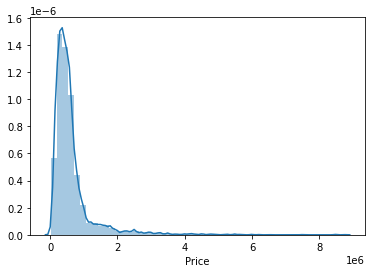

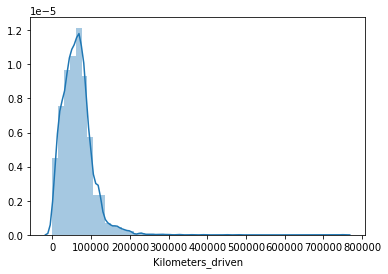

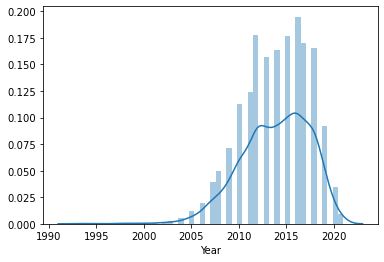

In [235]:
for i in df.describe().columns:
    sns.distplot(df[i].dropna())
    plt.show()

In [236]:
df.skew()

Price                4.385364
Kilometers_driven    2.469979
Year                -0.617623
dtype: float64

In [237]:
#we can see that there is skewness in columns Price and Kilometers_driven. Price is target variable. 
#So we need to treat skewness for Kilometers_driven column


In [238]:
#we can do log or square root transformation to remove skewness

In [241]:
df_log=pd.DataFrame({})
df_log['Kilometers_driven']=np.log(df['Kilometers_driven']+1)

In [242]:
df_log['Kilometers_driven'].skew()

-4.269775075449798

In [243]:
df_sqr=pd.DataFrame({})
df_sqr['Kilometers_driven']=np.sqrt(df['Kilometers_driven'])

In [244]:
df_sqr['Kilometers_driven'].skew()

0.12998800769902785

In [245]:
#we can see that squareroot transformation works.
df['Kilometers_driven']=df_sqr['Kilometers_driven']

Treating outliers

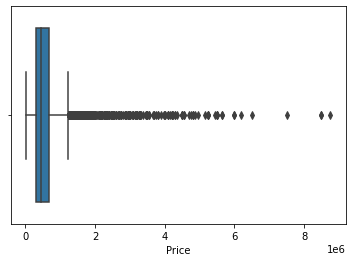

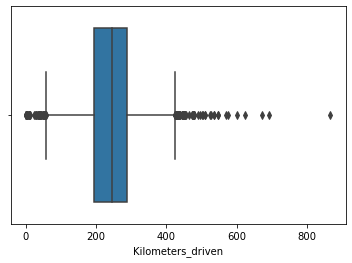

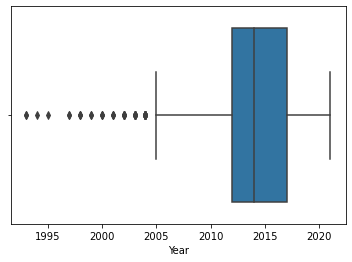

In [246]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

In [247]:
#we can use zscore or IQR technique to remove outliers. We will use IQR here 

In [248]:
num_train = df.select_dtypes(include=["number"])
cat_train = df.select_dtypes(exclude=["number"])

In [249]:
Q1 = num_train.quantile(0.02)
Q3 = num_train.quantile(0.98)
IQR = Q3 - Q1
idx = ~((num_train < (Q1 - 1.5 * IQR)) | (num_train > (Q3 + 1.5 * IQR))).any(axis=1)
df = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)

In [250]:
df.shape

(5832, 10)

In [251]:
# we treated outliers too

Encoding

In [252]:
df.columns

Index(['Price', 'Kilometers_driven', 'Year', 'Brand', 'Model', 'Fuel',
       'Transmission', 'Variant', 'No_owners', 'Location'],
      dtype='object')

In [253]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Brand']=le.fit_transform(df['Brand'].values.reshape(-1,1))
df['Model']=le.fit_transform(df['Model'].values.reshape(-1,1))
df['Fuel']=le.fit_transform(df['Fuel'].values.reshape(-1,1))
df['Transmission']=le.fit_transform(df['Transmission'].values.reshape(-1,1))
df['Variant']=le.fit_transform(df['Variant'].values.reshape(-1,1))
df['No_owners']=le.fit_transform(df['No_owners'].values.reshape(-1,1))
df['Location']=le.fit_transform(df['Location'].values.reshape(-1,1))

In [254]:
df.head()

,Price,Kilometers_driven,Year,Brand,Model,Fuel,Transmission,Variant,No_owners,Location
0,229000.0,262.678511,2011.0,2,31,2,1,545,2,1
1,2590000.0,148.323970,2016.0,29,40,5,0,457,0,1
2,195000.0,262.678511,2009.0,18,235,5,1,1463,2,1
5,2250000.0,137.840488,2019.0,29,111,2,1,425,0,1
6,395000.0,198.199395,2014.0,18,213,5,1,1461,0,1


In [255]:
#we will split the data into x(independent) and y (target) variables.

In [256]:
x=df.drop(['Price'],axis=1)
y=df['Price']

Required libraries to train the model.

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [258]:
lr=LinearRegression()
dr=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()

In [259]:
model=[lr,dr,rf,kn]

In [260]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

In [261]:
#we will use for loop and we will train the data with all the above mentioned machinelearning algorithms.From this we will get r2_score and mean_absolute, mean_squared error values.

In [262]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=34)
    m.fit(x_train,y_train)
    predv=m.predict(x_test)
    print(m)
    print('r2_score:',r2_score(y_test,predv))
    print('mean_squared_error:',mean_squared_error(y_test,predv))
    print('mean_absolute_error:',mean_absolute_error(y_test,predv))
    print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predv)))
    print('\n')

LinearRegression()
r2_score: 0.3646650679868234
mean_squared_error: 224170417134.6158
mean_absolute_error: 275994.81065743545
root_mean_squared_error 473466.38437656354


DecisionTreeRegressor()
r2_score: 0.4955080914610904
mean_squared_error: 178004003683.305
mean_absolute_error: 151097.46666666667
root_mean_squared_error 421905.2069876657


RandomForestRegressor()
r2_score: 0.759487891801458
mean_squared_error: 84861853022.86325
mean_absolute_error: 120754.80186008658
root_mean_squared_error 291310.5782886424


KNeighborsRegressor()
r2_score: 0.44437988295945174
mean_squared_error: 196043987398.41458
mean_absolute_error: 223257.5288
root_mean_squared_error 442768.54833921365




Required Liabraries for Regulariation.

In [264]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [265]:
#Here Grid search cv is to find best parameters for the Lasso regularization.
#Cross_val_score is crossvalidation technique.
#Cross-validation is a technique used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited. 
#In cross-validation, you make a fixed number of K-folds (or partitions) of the data, run the analysis on each fold, and then average (mean) the overall error estimate.

In [266]:
#let's find best alpha value for the lasso.

In [267]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [268]:
#Now we will use the above alpha and random_state best parameters for lasso and willcheck the r2_score.#Now we will use the above alpha and random_state best parameters for lasso and willcheck the r2_score.

In [269]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pre=ls.predict(x_test)
lss=r2_score(y_test,pre)
lss

0.3646715707483754

In [270]:
#let's do cross validation for this regularization.

In [271]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.3941970050643035

Hyper parameter Tunning.

In [272]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'max_depth':[10,20,30]}
gd=GridSearchCV(estimator=rf,param_grid=parameters,scoring='r2',cv=5)
gd.fit(x_train,y_train)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

best_parameter: {'criterion': 'mse', 'max_depth': 20, 'max_features': 'sqrt'}


In [273]:
#we got best parameters.now with the help of these best parameters we will get the r2_score.

In [274]:
gd_pred=gd.best_estimator_.predict(x_test)

In [275]:
r2_score(y_test,gd_pred)

0.7961741558494452

In [276]:
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,gd_pred)))

root_mean_squared_error 268174.45555879985


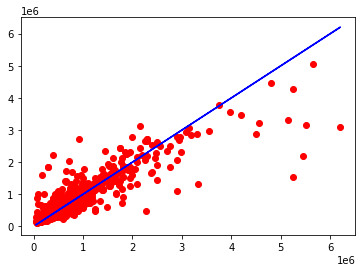

In [278]:
plt.scatter(x=y_test,y=gd_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.show()

In [279]:
import joblib
joblib.dump(gd.best_estimator_,'car_price.obj')

['car_price.obj']

End of the task